## Importando as bibliotecas

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
import warnings

warnings.filterwarnings("ignore")

## Carregando o conjunto de dados

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv")
df.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


Ao analisar a tabela, podemos notar que temos um conjunto de dados de série temporal.

## Visualização gráfica

<Axes: xlabel='tempo', ylabel='passageiros'>

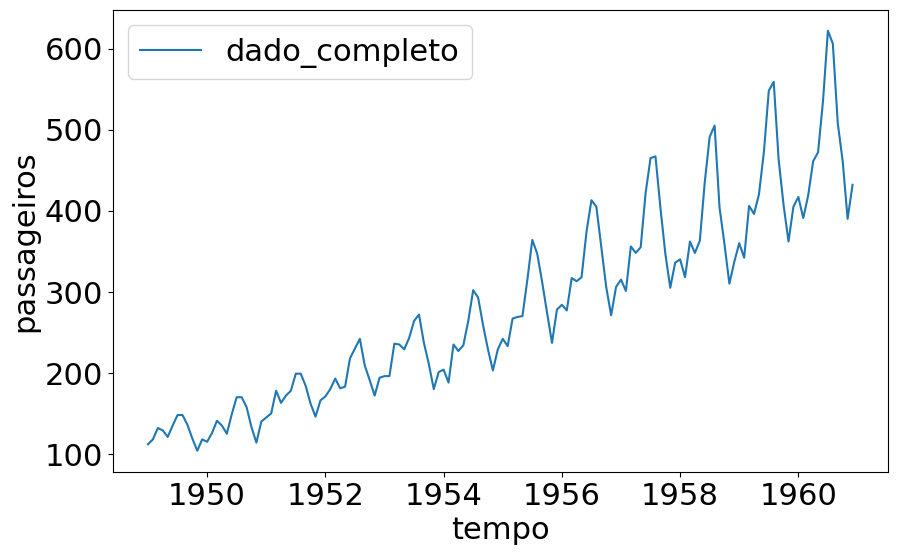

In [11]:
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22
sns.lineplot(x="tempo", y="passageiros", data=df, label='dado_completo')

## Criação do modelo

### Escalando os dados

In [15]:
# Instanciando o scaler.
sc = StandardScaler()
sc.fit(df)

# Transformando os dados.
df_sc = sc.transform(df)

### Dividindo os dados de entrada e saída

In [16]:
X = df_sc[:,0]
y = df_sc[:,1]

# Gerando o gráfico.
sns.lineplot(x=X, y=y, label='dado_escalado')
plt.xlabel('Data')
plt.ylabel('Passageiros')

### Separando os dados de treino e teste

In [20]:
# Dividindo os dados em treino e teste.
tamanho_treino = int(len(df)*0.9) # 90% dos dados para treino.
tamanho_teste = len(df) - tamanho_treino # 10% dos dados para teste.

# Dividindo os dados de treino e teste.
X_treino = X[0:tamanho_treino]
y_treino = y[0:tamanho_treino]
X_teste = X[tamanho_treino:len(df)]
y_teste = y[tamanho_treino:len(df)]

# Gerando o gráfico com os dados de treino e teste.	
sns.lineplot(x=X_treino, y=y_treino, label='treino')
sns.lineplot(x=X_teste, y=y_teste, label='teste')
plt.xlabel('Data')
plt.ylabel('Passageiros')

### Criando a rede neural 1

In [30]:
# Instanciando o modelo.
regressor = Sequential(
    [keras.layers.Dense(1, # Número de neurônios na camada oculta.
                        input_dim=1, # Número de neurônios na camada de entrada.
                        kernel_initializer='Ones', # Inicialização dos pesos.
                        activation='linear', # Função de ativação linear.
                        use_bias=False)] # Não utiliza bias.
)

# Compilando o modelo.
regressor.compile(loss='mean_squared_error', optimizer='adam')

# Analisando o resumo do modelo.
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 1         
                                                                 
Total params: 1 (4.00 Byte)
Trainable params: 1 (4.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# Treinando o modelo.
regressor.fit(X_treino, y_treino)

5/5 [==============================] - 0s 2ms/step - loss: 0.1284


5/5 [==============================] - 0s 2ms/step


<Axes: >

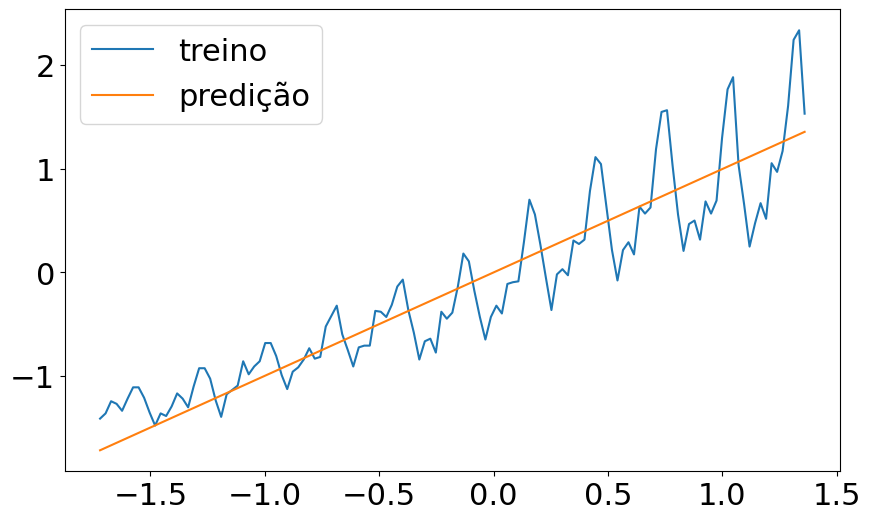

In [34]:
# Gerando as predições.
y_treino_predict = regressor.predict(X_treino)

# Gerando o gráfico com os dados de treino e teste.
sns.lineplot(x=X_treino, y=y_treino, label='treino')
sns.lineplot(x=X_treino, y=y_treino_predict[:,0], label='predição')

<Axes: xlabel='tempo', ylabel='passageiros'>

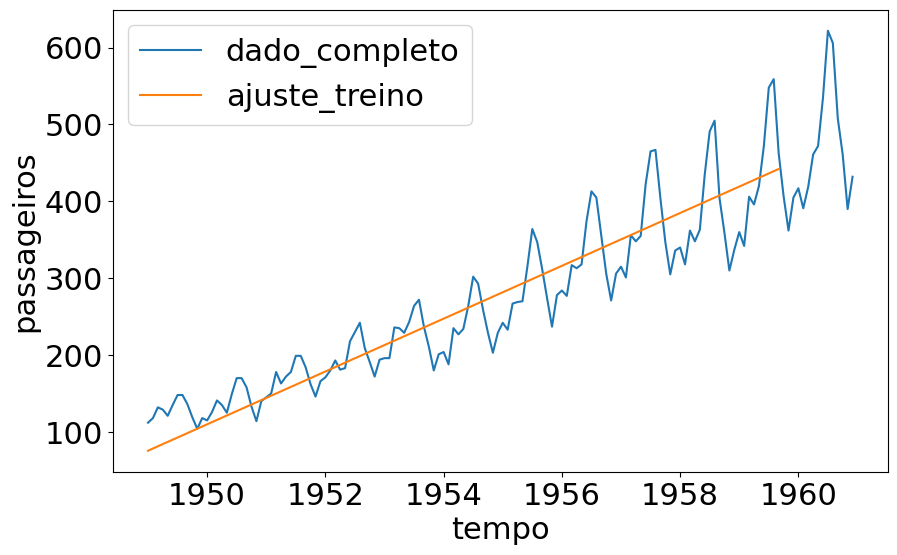

In [45]:
# Gerando data frame temporário com os resultados.
d = {'tempo': X_treino,
     'passageiros': y_treino_predict[:,0]}
resultados_treino = pd.DataFrame(data=d)

# Transformando os dados para a escala original.
resultados_treino_transformados = sc.inverse_transform(resultados_treino)
resultados_treino_transformados = pd.DataFrame(data=resultados_treino_transformados, columns=['tempo', 'passageiros'])

# Gerando o gráfico com os dados originais e preditos em treino.
sns.lineplot(x='tempo', y='passageiros', data=df, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultados_treino_transformados, label='ajuste_treino')

1/1 [==============================] - 0s 42ms/step


<Axes: xlabel='tempo', ylabel='passageiros'>

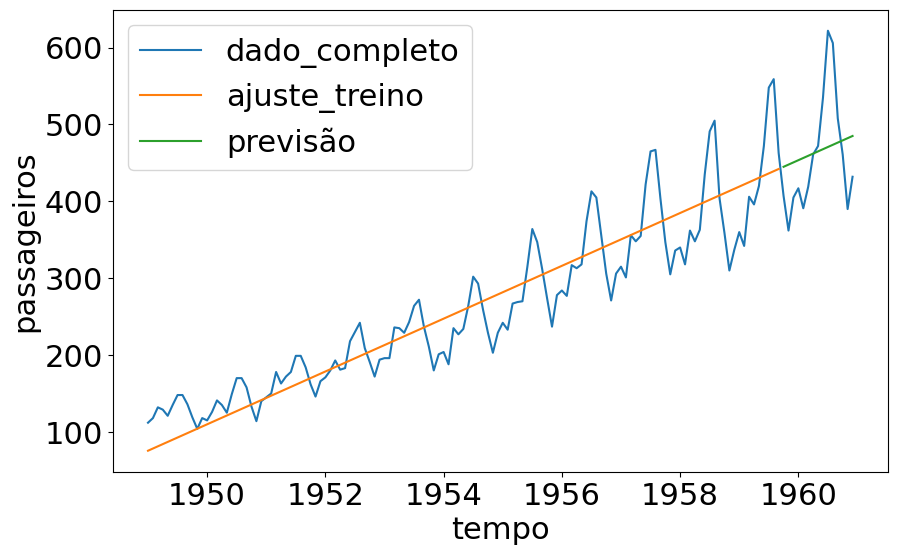

In [46]:
# Gerando as predições com os dados de teste.
y_teste_predict = regressor.predict(X_teste)

# Gerando data frame temporário com os resultados de teste.
d = {'tempo': X_teste,
     'passageiros': y_teste_predict[:,0]}
resultados_teste = pd.DataFrame(data=d)

# Transformando os dados para a escala original.
resultados_teste_transformados = sc.inverse_transform(resultados_teste)
resultados_teste_transformados = pd.DataFrame(data=resultados_teste_transformados, columns=['tempo', 'passageiros'])

# Gerando o gráfico com os dados originais e preditos em treino e teste.
sns.lineplot(x='tempo', y='passageiros', data=df, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultados_treino_transformados, label='ajuste_treino')
sns.lineplot(x='tempo', y='passageiros', data=resultados_teste_transformados, label='previsão')

No gráfico podemos observar que o modelo aprendeu a construir a reta com os dados em azul, os dados de treino (que estão na mesma faixa dos dados em laranja). 

### Criando a rede neural 2

No segundo modelo, alteramos a inicialização para random_uniform e a função de ativação para Sigmoid. Ainda, adicionamos mais duas camadas, pore´m a última camada deixamos com a função de ativação linear.

In [51]:
# Instanciando o modelo.
regressor2 = Sequential(
    [keras.layers.Dense(8, # Número de neurônios na camada oculta.
                        input_dim=1, # Número de neurônios na camada de entrada.
                        kernel_initializer='random_uniform', # Inicialização dos pesos.
                        activation='sigmoid', # Função de ativação sigmoid.
                        use_bias=False),
    keras.layers.Dense(8, # Número de neurônios na camada oculta.
                        kernel_initializer='random_uniform', # Inicialização dos pesos.
                        activation='sigmoid', # Função de ativação sigmoid.
                        use_bias=False),
    keras.layers.Dense(1, # Número de neurônios na camada oculta.
                        kernel_initializer='random_uniform', # Inicialização dos pesos.
                        activation='linear', # Função de ativação linear.
                        use_bias=False)] # Não utiliza bias.
)

# Compilando o modelo.
regressor2.compile(loss='mean_squared_error', optimizer='adam')

# Analisando o resumo do modelo.
regressor2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 8         
                                                                 
 dense_10 (Dense)            (None, 8)                 64        
                                                                 
 dense_11 (Dense)            (None, 1)                 8         
                                                                 
Total params: 80 (320.00 Byte)
Trainable params: 80 (320.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
# Treinando o modelo.
regressor2.fit(X_treino, y_treino, epochs=500) # Quantidade de vezes que o modelo irá treinar.

Epoch 1/500
5/5 [==============================] - 0s 4ms/step - loss: 0.6866
Epoch 2/500
5/5 [==============================] - 0s 4ms/step - loss: 0.6856
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 0.6849
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 0.6841
Epoch 5/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6833
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6825
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6818
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6816
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6810
Epoch 10/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6806
Epoch 11/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6799
Epoch 12/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6788
Epoch 13/500
5/5 [==============================] - 0s 3ms/st

1/1 [==============================] - 0s 43ms/step


<Axes: >

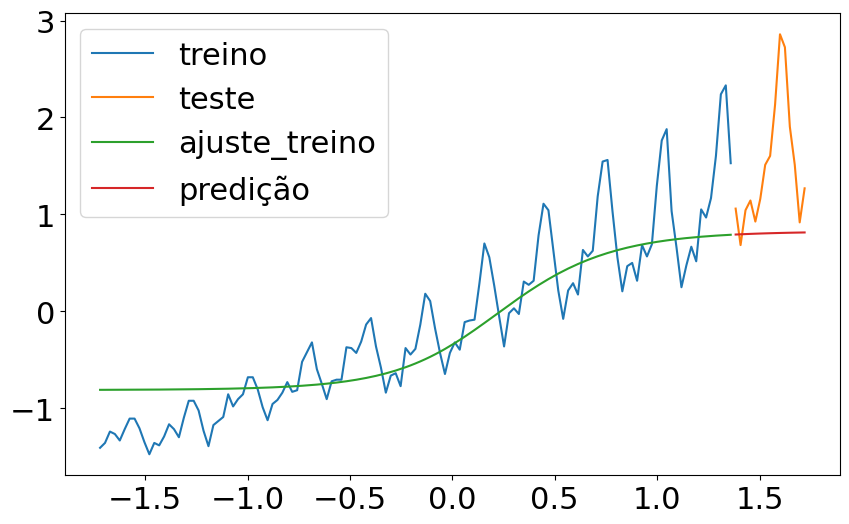

In [56]:
# Realizando predições com os dados de treino e teste.
y_treino_predict2 = regressor2.predict(X_treino)
y_teste_predict2 = regressor2.predict(X_teste)

sns.lineplot(x=X_treino, y=y_treino, label='treino') # Lineplot com os dados de treino (original).
sns.lineplot(x=X_teste, y=y_teste, label='teste') # Lineplot com os dados de teste (original).
sns.lineplot(x=X_treino, y=y_treino_predict2[:,0], label='ajuste_treino') # Lineplot com os dados de treino (predito).
sns.lineplot(x=X_teste, y=y_teste_predict2[:,0], label='predição') # Lineplot com os dados de teste (predito).

No gráfico acima podemos notar que a resposta é um pouco diferente da reta, porém está sendo refinado aos poucos.